In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (10).zip to archive (10).zip


In [2]:
pip install numpy pandas scikit-learn nltk matplotlib seaborn tensorflow

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import zipfile

zip_file_path = 'archive (10).zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())

['archive (10)/', '__MACOSX/._archive (10)', 'archive (10)/Fake.csv', '__MACOSX/archive (10)/._Fake.csv', 'archive (10)/True.csv', '__MACOSX/archive (10)/._True.csv']


In [5]:
import pandas as pd
import zipfile

zip_file_path = 'archive (10).zip'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        # Use the correct paths from namelist
        with z.open('archive (10)/True.csv') as true_file:
            df_true = pd.read_csv(true_file)

        with z.open('archive (10)/Fake.csv') as fake_file:
            df_fake = pd.read_csv(fake_file)


    df_true['label'] = 1
    df_fake['label'] = 0

    # Combine and shuffle
    df = pd.concat([df_true, df_fake], ignore_index=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("✅ Combined Dataset Head:")
    print(df.head())
    print("\nDataset Info:")
    df.info()

except FileNotFoundError:
    print(f"Error: The file '{zip_file_path}' was not found.")
except KeyError as e:
    print(f"Error: The file {e} was not found inside the zip archive.")

✅ Combined Dataset Head:
                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date  label  
0     July 21, 2017      0  
1       May 7, 2016      0  
2  December 3, 2016      0  
3  October 6, 2017       1  
4      Apr 25, 2017      0  

Dataset Info:
<class 'pandas.core.frame.Da

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text by removing URLs, punctuation, numbers,
    and stopwords, and then applies lemmatization.
    """
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords and apply lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned_words)

# Combine title and text for a richer feature set, then clean it
df['combined_text'] = df['title'] + " " + df['text']
df['cleaned_text'] = df['combined_text'].apply(clean_text)

print("\nSample of cleaned text:")
print(df[['text', 'cleaned_text']].head())


Sample of cleaned text:
                                                text  \
0  Donald Trump s White House is in chaos, and th...   
1  Now that Donald Trump is the presumptive GOP n...   
2  Mike Pence is a huge homophobe. He supports ex...   
3  SAN FRANCISCO (Reuters) - California Attorney ...   
4  Twisted reasoning is all that comes from Pelos...   

                                        cleaned_text  
0  breaking gop chairman grassley enough demand t...  
1  failed gop candidate remembered hilarious mock...  
2  mike penny new dc neighbor hilariously trollin...  
3  california ag pledge defend birth control insu...  
4  az rancher living u mexico border destroy nanc...  


FAKE NEWS DETECTION - 3 MODELS COMPARISON

📊 Data Split:
Training set: 31446 samples
Validation set: 6717 samples
Test set: 6735 samples
Class distribution - Fake (0): 23481, Real (1): 21417

FEATURE EXTRACTION: TF-IDF
TF-IDF matrix shape: (31446, 5000)
Number of features extracted: 5000

MODEL 1: LOGISTIC REGRESSION

📈 Logistic Regression Results:
Training Accuracy: 0.9918
Validation Accuracy: 0.9911
Test Accuracy: 0.9875
Test Precision: 0.9827
Test Recall: 0.9913
Test F1-Score: 0.9870

🔍 Top 10 Important Features (Logistic Regression):
1. reuters: 20.6055
2. said: 14.7313
3. via: -8.9379
4. washington reuters: 8.6497
5. video: -8.5945
6. image: -5.9073
7. president trump: -5.4150
8. gop: -5.1910
9. read: -5.1733
10. hillary: -5.1155

MODEL 2: MULTINOMIAL NAIVE BAYES

📈 Naive Bayes Results:
Training Accuracy: 0.9473
Validation Accuracy: 0.9503
Test Accuracy: 0.9457
Test Precision: 0.9414
Test Recall: 0.9449
Test F1-Score: 0.9432

🔍 Top 10 Features Associated with Fake News (Naive Baye

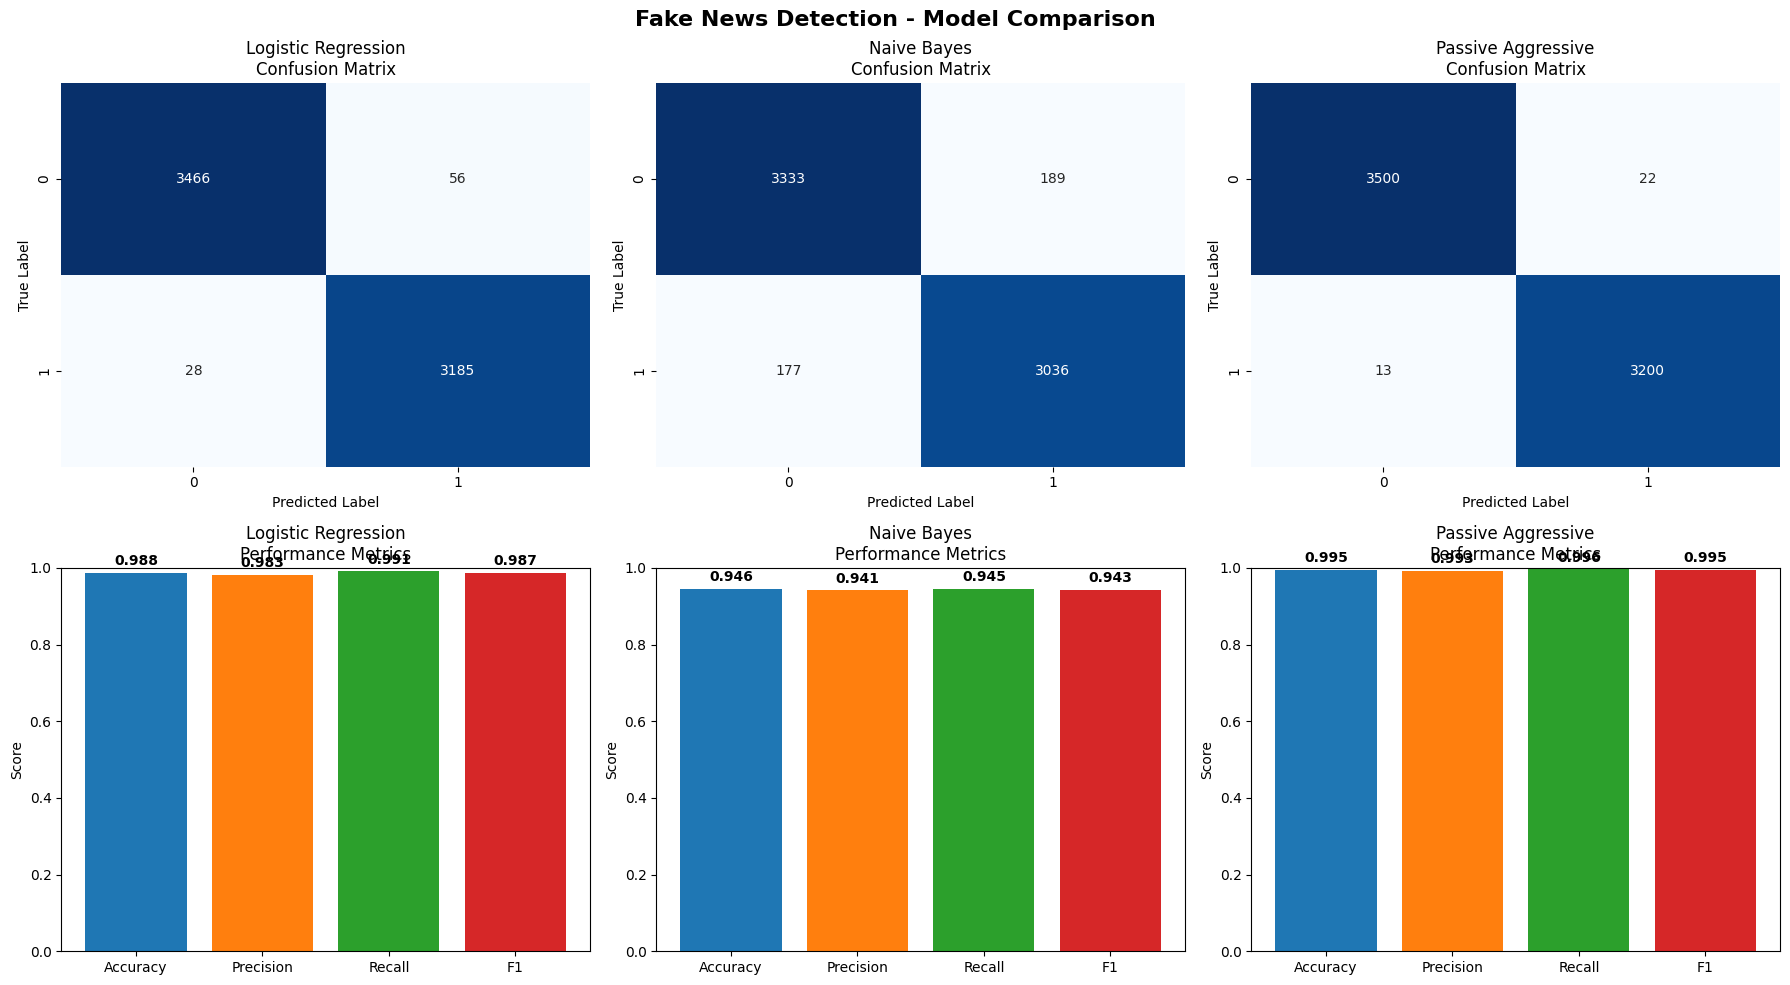


ERROR ANALYSIS - LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      3522
        Real       0.98      0.99      0.99      3213

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735


Misclassified samples: 84 out of 6735

📄 Sample Misclassified Articles:

1. True: Fake | Predicted: Real
Text: breaking independence day historic uk brexit vote uk leave eu globalist elite shocking victory leave stayit three clock morning became clear leave would win john rentoul johnrentoul june watch see out...

2. True: Real | Predicted: Fake
Text: emmy winner throw jab trump spicer wheel spotlight los angeles reuters emmy award show peppered political joke pointed speech sunday host stephen colbert took shot u president donald trump sean spicer...

3. True: Real | Predicted: Fake
Text: morocco mule 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


print("="*60)
print("FAKE NEWS DETECTION - 3 MODELS COMPARISON")
print("="*60)

# Split data: 70% train, 15% validation, 15% test
X = df['cleaned_text'].values
y = df['label'].values

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"\n📊 Data Split:")
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Class distribution - Fake (0): {(y == 0).sum()}, Real (1): {(y == 1).sum()}")


print("\n" + "="*60)
print("FEATURE EXTRACTION: TF-IDF")
print("="*60)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Number of features extracted: {len(tfidf.get_feature_names_out())}")


print("\n" + "="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)

lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)

lr_pred_train = lr_model.predict(X_train_tfidf)
lr_pred_val = lr_model.predict(X_val_tfidf)
lr_pred_test = lr_model.predict(X_test_tfidf)

print("\n📈 Logistic Regression Results:")
print(f"Training Accuracy: {accuracy_score(y_train, lr_pred_train):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, lr_pred_val):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, lr_pred_test):.4f}")
print(f"Test Precision: {precision_score(y_test, lr_pred_test):.4f}")
print(f"Test Recall: {recall_score(y_test, lr_pred_test):.4f}")
print(f"Test F1-Score: {f1_score(y_test, lr_pred_test):.4f}")

# Top important features for Logistic Regression
feature_names = np.array(tfidf.get_feature_names_out())
top_indices = np.argsort(np.abs(lr_model.coef_[0]))[-10:]
print(f"\n🔍 Top 10 Important Features (Logistic Regression):")
for i, idx in enumerate(top_indices[::-1], 1):
    print(f"{i}. {feature_names[idx]}: {lr_model.coef_[0][idx]:.4f}")


print("\n" + "="*60)
print("MODEL 2: MULTINOMIAL NAIVE BAYES")
print("="*60)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred_train = nb_model.predict(X_train_tfidf)
nb_pred_val = nb_model.predict(X_val_tfidf)
nb_pred_test = nb_model.predict(X_test_tfidf)

print("\n📈 Naive Bayes Results:")
print(f"Training Accuracy: {accuracy_score(y_train, nb_pred_train):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, nb_pred_val):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, nb_pred_test):.4f}")
print(f"Test Precision: {precision_score(y_test, nb_pred_test):.4f}")
print(f"Test Recall: {recall_score(y_test, nb_pred_test):.4f}")
print(f"Test F1-Score: {f1_score(y_test, nb_pred_test):.4f}")

# Top discriminative features for Naive Bayes
nb_feature_log_prob = nb_model.feature_log_prob_
fake_indices = np.argsort(nb_feature_log_prob[0])[-10:]
print(f"\n🔍 Top 10 Features Associated with Fake News (Naive Bayes):")
for i, idx in enumerate(fake_indices[::-1], 1):
    print(f"{i}. {feature_names[idx]}")


print("\n" + "="*60)
print("MODEL 3: PASSIVE AGGRESSIVE CLASSIFIER")
print("="*60)

from sklearn.linear_model import PassiveAggressiveClassifier

pa_model = PassiveAggressiveClassifier(max_iter=50, random_state=42, n_jobs=-1)
pa_model.fit(X_train_tfidf, y_train)

pa_pred_train = pa_model.predict(X_train_tfidf)
pa_pred_val = pa_model.predict(X_val_tfidf)
pa_pred_test = pa_model.predict(X_test_tfidf)

print("\n📈 Passive Aggressive Classifier Results:")
print(f"Training Accuracy: {accuracy_score(y_train, pa_pred_train):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, pa_pred_val):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, pa_pred_test):.4f}")
print(f"Test Precision: {precision_score(y_test, pa_pred_test):.4f}")
print(f"Test Recall: {recall_score(y_test, pa_pred_test):.4f}")
print(f"Test F1-Score: {f1_score(y_test, pa_pred_test):.4f}")

pa_top_indices = np.argsort(np.abs(pa_model.coef_[0]))[-10:]
print(f"\n🔍 Top 10 Important Features (Passive Aggressive):")
for i, idx in enumerate(pa_top_indices[::-1], 1):
    print(f"{i}. {feature_names[idx]}: {pa_model.coef_[0][idx]:.4f}")


print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

models_results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, lr_pred_test),
        'Precision': precision_score(y_test, lr_pred_test),
        'Recall': recall_score(y_test, lr_pred_test),
        'F1-Score': f1_score(y_test, lr_pred_test)
    },
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test, nb_pred_test),
        'Precision': precision_score(y_test, nb_pred_test),
        'Recall': recall_score(y_test, nb_pred_test),
        'F1-Score': f1_score(y_test, nb_pred_test)
    },
    'Passive Aggressive': {
        'Accuracy': accuracy_score(y_test, pa_pred_test),
        'Precision': precision_score(y_test, pa_pred_test),
        'Recall': recall_score(y_test, pa_pred_test),
        'F1-Score': f1_score(y_test, pa_pred_test)
    }
}

comparison_df = pd.DataFrame(models_results).T
print("\n", comparison_df.round(4))


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Fake News Detection - Model Comparison', fontsize=16, fontweight='bold')

models_names = ['Logistic Regression', 'Naive Bayes', 'Passive Aggressive']
predictions = [lr_pred_test, nb_pred_test, pa_pred_test]

for idx, (model_name, pred) in enumerate(zip(models_names, predictions)):
    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, idx], cbar=False)
    axes[0, idx].set_title(f'{model_name}\nConfusion Matrix')
    axes[0, idx].set_ylabel('True Label')
    axes[0, idx].set_xlabel('Predicted Label')

    # Classification Report Visualization
    metrics = [accuracy_score(y_test, pred),
               precision_score(y_test, pred),
               recall_score(y_test, pred),
               f1_score(y_test, pred)]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1']
    axes[1, idx].bar(metric_names, metrics, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    axes[1, idx].set_title(f'{model_name}\nPerformance Metrics')
    axes[1, idx].set_ylim([0, 1])
    axes[1, idx].set_ylabel('Score')
    for i, v in enumerate(metrics):
        axes[1, idx].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved as 'model_comparison.png'")
plt.show()


print("\n" + "="*60)
print("ERROR ANALYSIS - LOGISTIC REGRESSION")
print("="*60)

print("\nClassification Report:")
print(classification_report(y_test, lr_pred_test, target_names=['Fake', 'Real']))

# Find misclassified examples
misclassified_indices = np.where(y_test != lr_pred_test)[0]
print(f"\nMisclassified samples: {len(misclassified_indices)} out of {len(y_test)}")

if len(misclassified_indices) > 0:
    print("\n📄 Sample Misclassified Articles:")
    for i, idx in enumerate(misclassified_indices[:5]):
        true_label = "Real" if y_test[idx] == 1 else "Fake"
        pred_label = "Real" if lr_pred_test[idx] == 1 else "Fake"
        print(f"\n{i+1}. True: {true_label} | Predicted: {pred_label}")
        print(f"Text: {X_test[idx][:200]}...")

print("\n✅ Analysis Complete!")